In [1]:
# Forecasting for PM10 and CO in AQI

In [1]:
# Libraries
import pandas as pd
import pandas as pandasForSortingCSV
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout

import math
import glob
import os



In [2]:
# Upload Dataset and Sort
df = pd.read_csv('ispu_data.csv', index_col=0)
df.head(10)

pm10 so2  co   o3  no2  max critical     categori lokasi_spku
tanggal                                                                  
2019-01-01    29  15   7   71   13   71       O3       SEDANG        DKI2
2019-01-02    24  17   6   79    6   79       O3       SEDANG        DKI2
2019-01-03    23  16   6   65    4   65       O3       SEDANG        DKI2
2019-01-04    42  18  10   64   11   64       O3       SEDANG        DKI2
2019-01-05    54  29  16   51   20   54     PM10       SEDANG        DKI3
2019-01-06    69  34  30  105   27  105       O3  TIDAK SEHAT        DKI2
2019-01-07    71  47  16  132   25  132       O3  TIDAK SEHAT        DKI3
2019-01-08    51  22  25  143   26  143       O3  TIDAK SEHAT        DKI3
2019-01-09    61  22  28  198   21  198       O3  TIDAK SEHAT        DKI1
2019-01-10    59  22  27  128   18  128       O3  TIDAK SEHAT        DKI1

In [3]:
df.shape

(1076, 9)

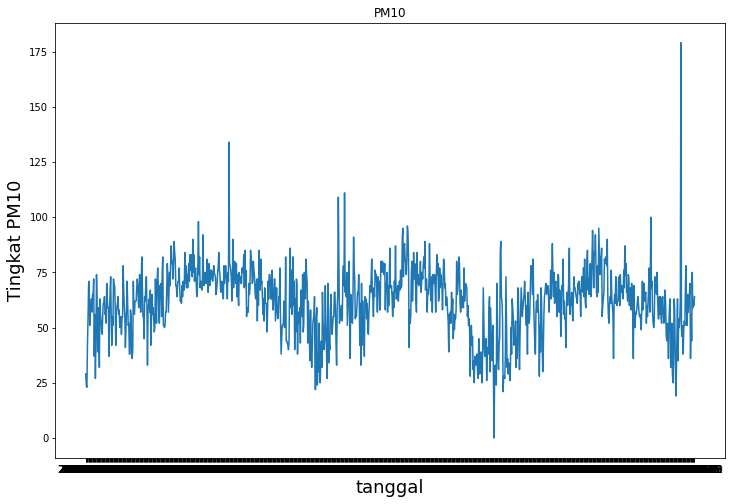

In [4]:
# PM10 Graph
plt.figure(figsize=(12,8))
plt.title("PM10")
plt.plot(df['pm10'])
plt.xlabel('tanggal', fontsize=18)
plt.ylabel('Tingkat PM10', fontsize=18)
plt.show()

In [13]:
df.describe()

pm10           o3          no2          max
count  1076.000000  1076.000000  1076.000000  1076.000000
mean     61.869888    81.512082    25.739777    98.025093
std      15.001637    38.504181    22.025802    32.307251
min       0.000000    18.000000     3.000000    41.000000
25%      54.000000    53.000000    13.000000    76.000000
50%      63.000000    73.000000    17.000000    92.000000
75%      71.000000   100.000000    32.000000   114.000000
max     179.000000   243.000000   148.000000   243.000000

In [14]:
# Only PM10 Dataframe
data = df.filter(['pm10'])
print(data)
dataset = data.values

#Train Data
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

            pm10
tanggal         
2019-01-01    29
2019-01-02    24
2019-01-03    23
2019-01-04    42
2019-01-05    54
...          ...
2021-12-27    75
2021-12-28    59
2021-12-29    61
2021-12-30    60
2021-12-31    64

[1076 rows x 1 columns]


861

In [15]:
 #Data Scalling
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)

scaled_data

array([[0.16201117],
       [0.13407821],
       [0.12849162],
       ...,
       [0.34078212],
       [0.33519553],
       [0.3575419 ]])

In [16]:
#Build Training Dataset

train_data = scaled_data[0:training_data_len , :]

#Split train data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.16201117, 0.13407821, 0.12849162, 0.23463687, 0.30167598,
       0.38547486, 0.39664804, 0.2849162 , 0.34078212, 0.32960894,
       0.35195531, 0.31843575, 0.36312849, 0.36312849, 0.40223464,
       0.20670391, 0.31284916, 0.15083799, 0.24581006, 0.41340782,
       0.34636872, 0.21787709, 0.32960894, 0.2849162 , 0.17877095,
       0.35195531, 0.31284916, 0.29608939, 0.26815642, 0.26256983,
       0.31284916, 0.34078212, 0.34078212, 0.3575419 , 0.31284916,
       0.31843575, 0.29050279, 0.39106145, 0.35195531, 0.32960894,
       0.32960894, 0.20670391, 0.31284916, 0.37430168, 0.40782123,
       0.30167598, 0.23463687, 0.30726257, 0.2849162 , 0.40223464,
       0.38547486, 0.38547486, 0.33519553, 0.23463687, 0.31843575,
       0.32960894, 0.34078212, 0.3575419 , 0.31284916, 0.32402235])]
[0.27932960893854747]



In [17]:
# Convert x_train, y_train to numpy

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# Reshape Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(801, 60, 1)

In [29]:
# LSTM Model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')  


In [30]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [31]:
#Training Model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
26/26 [==============================] - 40s 628ms/step - loss: 0.0177
Epoch 2/20
26/26 [==============================] - 17s 638ms/step - loss: 0.0066
Epoch 3/20
26/26 [==============================] - 17s 636ms/step - loss: 0.0059
Epoch 4/20
26/26 [==============================] - 17s 639ms/step - loss: 0.0058
Epoch 5/20
26/26 [==============================] - 17s 637ms/step - loss: 0.0058
Epoch 6/20
26/26 [==============================] - 17s 641ms/step - loss: 0.0064
Epoch 7/20
26/26 [==============================] - 17s 641ms/step - loss: 0.0067
Epoch 8/20
26/26 [==============================] - 17s 639ms/step - loss: 0.0063
Epoch 9/20
26/26 [==============================] - 17s 637ms/step - loss: 0.0062
Epoch 10/20
26/26 [==============================] - 17s 639ms/step - loss: 0.0061
Epoch 11/20
26/26 [==============================] - 17s 636ms/step - loss: 0.0055
Epoch 12/20
26/26 [==============================] - 17s 641ms/step - loss: 0.0061
Epoch 13/20
2

In [32]:
# Build Testing Dataset
# Dataset containing the remainder of training_data_len
test_data = scaled_data[training_data_len - 60: , :]

# Dataset x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [33]:
#Convert Data to numpy (test)
x_test = np.array(x_test)

In [34]:
#Reshape test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
#Trying Predict Value
pred = model.predict(x_test)
pred = scale.inverse_transform(pred)

7/7 [==============================] - 3s 342ms/step


In [41]:
# Evaluate the Model use root mean squared error RMSE
rmse = np.sqrt(np.mean(pred - y_test) ** 2)
rmse

4.4244795865790785

C:\Users\zarek\AppData\Local\Temp\ipykernel_3968\1435648989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = pred


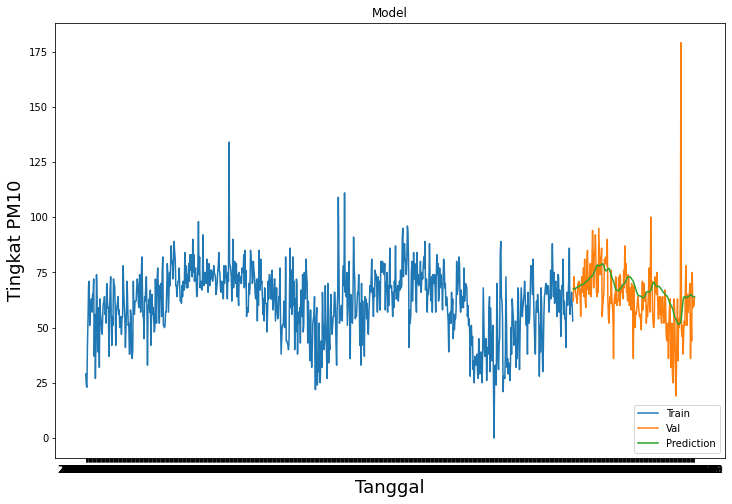

In [27]:
#Plot Data
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = pred

# Graph the Plot
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Tingkat PM10', fontsize=18)
plt.plot(train['pm10'])
plt.plot(validation[['pm10', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [28]:
validation

pm10  Predictions
tanggal                      
2021-05-31    62    65.499260
2021-06-01    73    65.353233
2021-06-02    68    65.321350
2021-06-03    68    65.409172
2021-06-04    66    65.603676
...          ...          ...
2021-12-27    75    62.311630
2021-12-28    59    62.005451
2021-12-29    61    61.820545
2021-12-30    60    61.753395
2021-12-31    64    61.769482

[215 rows x 2 columns]

In [45]:
validation[['pm10','Predictions']]

pm10  Predictions
tanggal                      
2021-05-31    62    67.660362
2021-06-01    73    67.501152
2021-06-02    68    67.461510
2021-06-03    68    67.541252
2021-06-04    66    67.723007
...          ...          ...
2021-12-27    75    64.267288
2021-12-28    59    64.023857
2021-12-29    61    63.894474
2021-12-30    60    63.871044
2021-12-31    64    63.918747

[215 rows x 2 columns]